# Notebook for processing and plotting Cardenas Basalts and Unkar Intrusions related geocheical attributes

## import python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import pyrolite 
from pyrolite.util.classification import TAS
from pyrolite.plot import pyroplot

from pyrolite.geochem.ind import REE
from pyrolite import geochem
from pyrolite.geochem.norm import get_reference_composition, all_reference_compositions
%matplotlib inline
%config InlineBackend.figure_format='retina'

## import major and trace element geochemical data

Larson et al., 1994 developed major and trace lement geochemical data from the Cardenas Basalt mainly in the area near Basalt Canyon (Ochoa Point 0.7 km southwest of Basalt Canyon, Basalt Cliffs 1.5 km west of Ochoa Point)

Hendircks 1989 developed comprehensive volcanistratigraphy at Basalt Canyon but developed major element geochemical data from dikes within the Unkar Group, with the goal if investigating the feeder relationship between the intrusives and the lava flows. 

We developed major element data with XRF and trace element data with ICPMS. Data collected by WSU GeoAnalytical Lab.

In [24]:
Larson1994_major_data = pd.read_csv('../data/geochem/Larson1994a_major.csv')
Larson1994a_trace_data = pd.read_csv('../data/geochem/Larson1994a_trace.csv')

Hendricks1989a_major_data = pd.read_csv('../data/geochem/Hendricks1989a_major.csv')

In [25]:
# import new data from this study
new_XRF_data = pd.read_excel('../data/geochem/GAL-NS-311_XRF.xlsx', engine = 'openpyxl', sheet_name='GAL-NS-311_XRF')
new_XRF_data

,Unnamed: 0,UI1-6,UI2-1,UI3-2,UI4-4,UI5-8,CB1-4,CB2-2,CB3-2,CB4-6,...,UI2-1®,CB16-5.1,CB16-5®,Unnamed: 29,USGS,AGV-2,USGS.1,BCR-2,USGS.2,GSP-2
0,NaN,GAL-NS-311-1,GAL-NS-311-2,GAL-NS-311-3,GAL-NS-311-4,GAL-NS-311-5,GAL-NS-311-6,GAL-NS-311-7,GAL-NS-311-8,GAL-NS-311-9,...,GAL-NS-311-2®,GAL-NS-311-21,GAL-NS-311-21®,NaN,AGV-2,USGS CRM-1,BCR-2,USGS CRM-2,GSP-2,USGS CRM-3
1,Date,2024-03-29 18:06:51,2024-03-29 19:12:40,2024-03-29 20:18:27,2024-03-29 21:24:13,2024-03-29 22:30:00,2024-03-29 23:35:46,2024-03-30 03:58:50,2024-03-30 05:04:36,2024-03-30 06:10:24,...,2024-03-30 22:37:08,2024-03-30 19:19:51,2024-04-06 20:10:44,NaN,PV,2024-03-30 00:41:31,PV,2024-03-30 01:47:17,GeoRem,2024-03-30 02:53:05
2,SO3 >/=,0.0751,0.0729,0.06756,0.0078,0.11542,0,0.0014,0,0,...,0.0809,0,0,NaN,0.005993,0,0.079408,0.0257,NaN,0.0382
3,Cl >/=,0.026,0.0147,0.227755,0.1022,0.078406,0.006866,0.0046,0.005929,0.0065,...,0.0268,0.019701,0.0154,NaN,0.0068,0.0117,0.0096,0.0164,NaN,0.049
4,NaN,Unnormalized Major Elements (Weight %):,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unnormalized Major Elements (Weight %):,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,ThO2,1.376869,2.105131,2.196505,1.832033,2.151216,3.804256,4.312673,3.510846,5.131967,...,1.285837,6.159271,5.7123,NaN,7.025447,6.747797,6.63173,5.905745,119.480387,121.813099
76,Nd2O3,26.803627,27.176872,26.344653,20.960017,24.127988,22.097013,22.884559,20.677984,32.390632,...,25.287321,29.31568,29.311364,NaN,35.563211,32.83386,32.962163,31.550832,233.27787,240.567804
77,U2O3,0.693521,0.594447,1.182949,0.671505,0,1.226762,0.924695,1.803321,0,...,0,0.230018,2.399804,NaN,2.07506,0.737555,1.852693,1.034778,2.641986,1.717291
78,sum tr.,2692.576348,2079.258878,2324.226804,2075.552248,2967.540855,2005.203664,2046.450043,1724.889792,2036.57682,...,2072.556293,2128.665356,2144.338959,NaN,3109.049153,3104.378352,2596.412605,2550.263502,4350.524001,4406.377561


In [26]:
new_XRF_norm_major = new_XRF_data.iloc[19:29, :24]
new_XRF_norm_major = new_XRF_norm_major.T

new_XRF_norm_major.columns = ['SiO2',	'TiO2',	'Al2O3', 'FeO',	'MnO',	'MgO',	'CaO',	'Na2O',	'K2O',	'P2O5']
new_XRF_norm_major = new_XRF_norm_major.iloc[1:]
new_XRF_norm_major

UI_new_XRF_norm_major = new_XRF_norm_major[new_XRF_norm_major.index.str.contains('UI')]
CB_new_XRF_norm_major = new_XRF_norm_major[new_XRF_norm_major.index.str.contains('CB')]

In [42]:
new_trace_data = pd.read_excel('../data/geochem/NS-311-ICP-MS.xlsx', engine = 'openpyxl', sheet_name='Sheet1')
new_trace_data = new_trace_data.iloc[:23]
new_trace_data.columns = new_trace_data.columns.str.replace(' ppm', '')
UI_new_trace_data = new_trace_data[new_trace_data['Sample ID'].str.contains('UI')]
CB_new_trace_data = new_trace_data[new_trace_data['Sample ID'].str.contains('CB')]
UI_new_trace_data

,Sample ID,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,...,Y,Hf,Ta,U,Pb,Rb,Cs,Sr,Sc,Zr
0,UI1-6,19.375211,43.694714,5.879584,26.304598,6.395743,2.182603,7.425784,1.253097,7.680224,...,44.491403,4.694580,0.484381,0.316945,5.631150,63.534580,1.372110,347.411745,32.213584,186.386988
1,UI2-1,17.907239,40.191735,5.471698,24.431978,5.975301,1.942076,6.834326,1.163557,7.031249,...,40.647145,4.365418,0.456620,0.281374,4.014512,19.080867,1.060197,252.805183,29.699954,172.707145
2,UI3-2,19.350135,43.328814,5.857120,26.140650,6.359839,2.264385,7.245230,1.230823,7.623026,...,43.321456,4.575795,0.484980,0.315559,7.551462,34.772442,3.057623,281.846180,30.856827,179.976138
3,UI4-4,13.258576,31.443284,4.367266,20.064427,5.116635,1.812125,5.448081,0.891953,5.274939,...,28.664178,3.369338,0.514970,0.405526,4.571865,35.560928,0.653299,339.496406,31.978629,127.071023
4,UI5-8,14.437372,34.892477,5.002489,22.991278,5.712524,1.910444,6.374785,1.055654,6.053005,...,33.307039,4.138945,0.627857,0.476350,33.169747,41.289741,1.364608,487.822267,33.771373,157.446232


In [27]:
Hendricks1989a_major_data

,contact,sample,name,SiO2,Al2O3,Fe2O3,FeO,MgO,CaO,Na2O,K2O,TiO2,P2O5,MnO,H2O+,H2O-,CO2,Total
0,upper,HN7,Hance sill,44.6,14.84,2.44,8.15,6.94,13.64,1.87,1.37,1.89,0.48,0.55,2.85,0.38,0.12,100.12
1,lower,CC13,Clear Creek sill,47.0,16.10,3.31,7.46,6.12,8.78,2.72,1.10,2.30,0.33,0.13,2.42,0.53,2.08,100.38
2,upper,BA5,Bright Angel sill,47.1,16.93,2.78,6.62,8.70,7.74,2.89,1.00,2.23,0.35,0.13,2.67,0.73,0.51,100.38
3,upper,CR12,Crystal Creek sill,43.2,16.49,2.78,5.74,8.89,4.87,2.83,3.04,2.51,0.39,0.14,4.17,0.69,4.53,100.27
4,lower,SH17,Shinumo Creek sill,45.5,16.49,5.48,6.03,7.33,4.87,3.28,1.91,2.59,0.40,0.14,3.71,0.97,1.72,100.42
5,upper,TP4,Tapeats Creek sill,48.0,15.72,4.04,7.60,6.16,8.48,3.85,1.07,2.64,0.41,0.21,1.05,0.53,0.12,99.88
6,dike,Tid1,Unkar dike,46.6,16.70,13.60,0.50,2.80,7.50,2.80,2.20,1.62,0.51,0.09,1.57,0.47,2.83,99.80
7,dike,Tid2,Unkar dike,48.1,16.10,10.90,2.88,5.10,5.90,2.70,1.90,1.67,0.51,0.09,1.99,0.56,1.49,99.90
8,0,dike,dike,66.1,14.90,3.38,0.50,3.20,0.66,1.42,7.66,0.65,0.18,0.02,1.38,0.32,0.02,100.39
9,3.7,dike,dike,65.7,15.60,2.94,0.60,3.08,0.52,1.02,7.89,0.61,0.18,0.02,1.52,0.34,0.02,100.04


In [28]:
Hendricks1989a_sills = Hendricks1989a_major_data[Hendricks1989a_major_data['name'].str.contains('sill')].reset_index(drop=1)
Hendricks1989a_lavas = Hendricks1989a_major_data[Hendricks1989a_major_data['name'].str.contains('Cardenas Basalt')].reset_index(drop=1)
Hendricks1989a_Unkar_dike = Hendricks1989a_major_data[Hendricks1989a_major_data['sample'].str.contains('Tid1|Tid2')].reset_index(drop=1)
Hendricks1989a_Shinumo_dike = Hendricks1989a_major_data[Hendricks1989a_major_data['sample'] == 'dike'].reset_index(drop=1)

In [29]:
Hendricks1989a_sills

,contact,sample,name,SiO2,Al2O3,Fe2O3,FeO,MgO,CaO,Na2O,K2O,TiO2,P2O5,MnO,H2O+,H2O-,CO2,Total
0,upper,HN7,Hance sill,44.6,14.84,2.44,8.15,6.94,13.64,1.87,1.37,1.89,0.48,0.55,2.85,0.38,0.12,100.12
1,lower,CC13,Clear Creek sill,47.0,16.10,3.31,7.46,6.12,8.78,2.72,1.10,2.30,0.33,0.13,2.42,0.53,2.08,100.38
2,upper,BA5,Bright Angel sill,47.1,16.93,2.78,6.62,8.70,7.74,2.89,1.00,2.23,0.35,0.13,2.67,0.73,0.51,100.38
3,upper,CR12,Crystal Creek sill,43.2,16.49,2.78,5.74,8.89,4.87,2.83,3.04,2.51,0.39,0.14,4.17,0.69,4.53,100.27
4,lower,SH17,Shinumo Creek sill,45.5,16.49,5.48,6.03,7.33,4.87,3.28,1.91,2.59,0.40,0.14,3.71,0.97,1.72,100.42
5,upper,TP4,Tapeats Creek sill,48.0,15.72,4.04,7.60,6.16,8.48,3.85,1.07,2.64,0.41,0.21,1.05,0.53,0.12,99.88


## TAS diagram

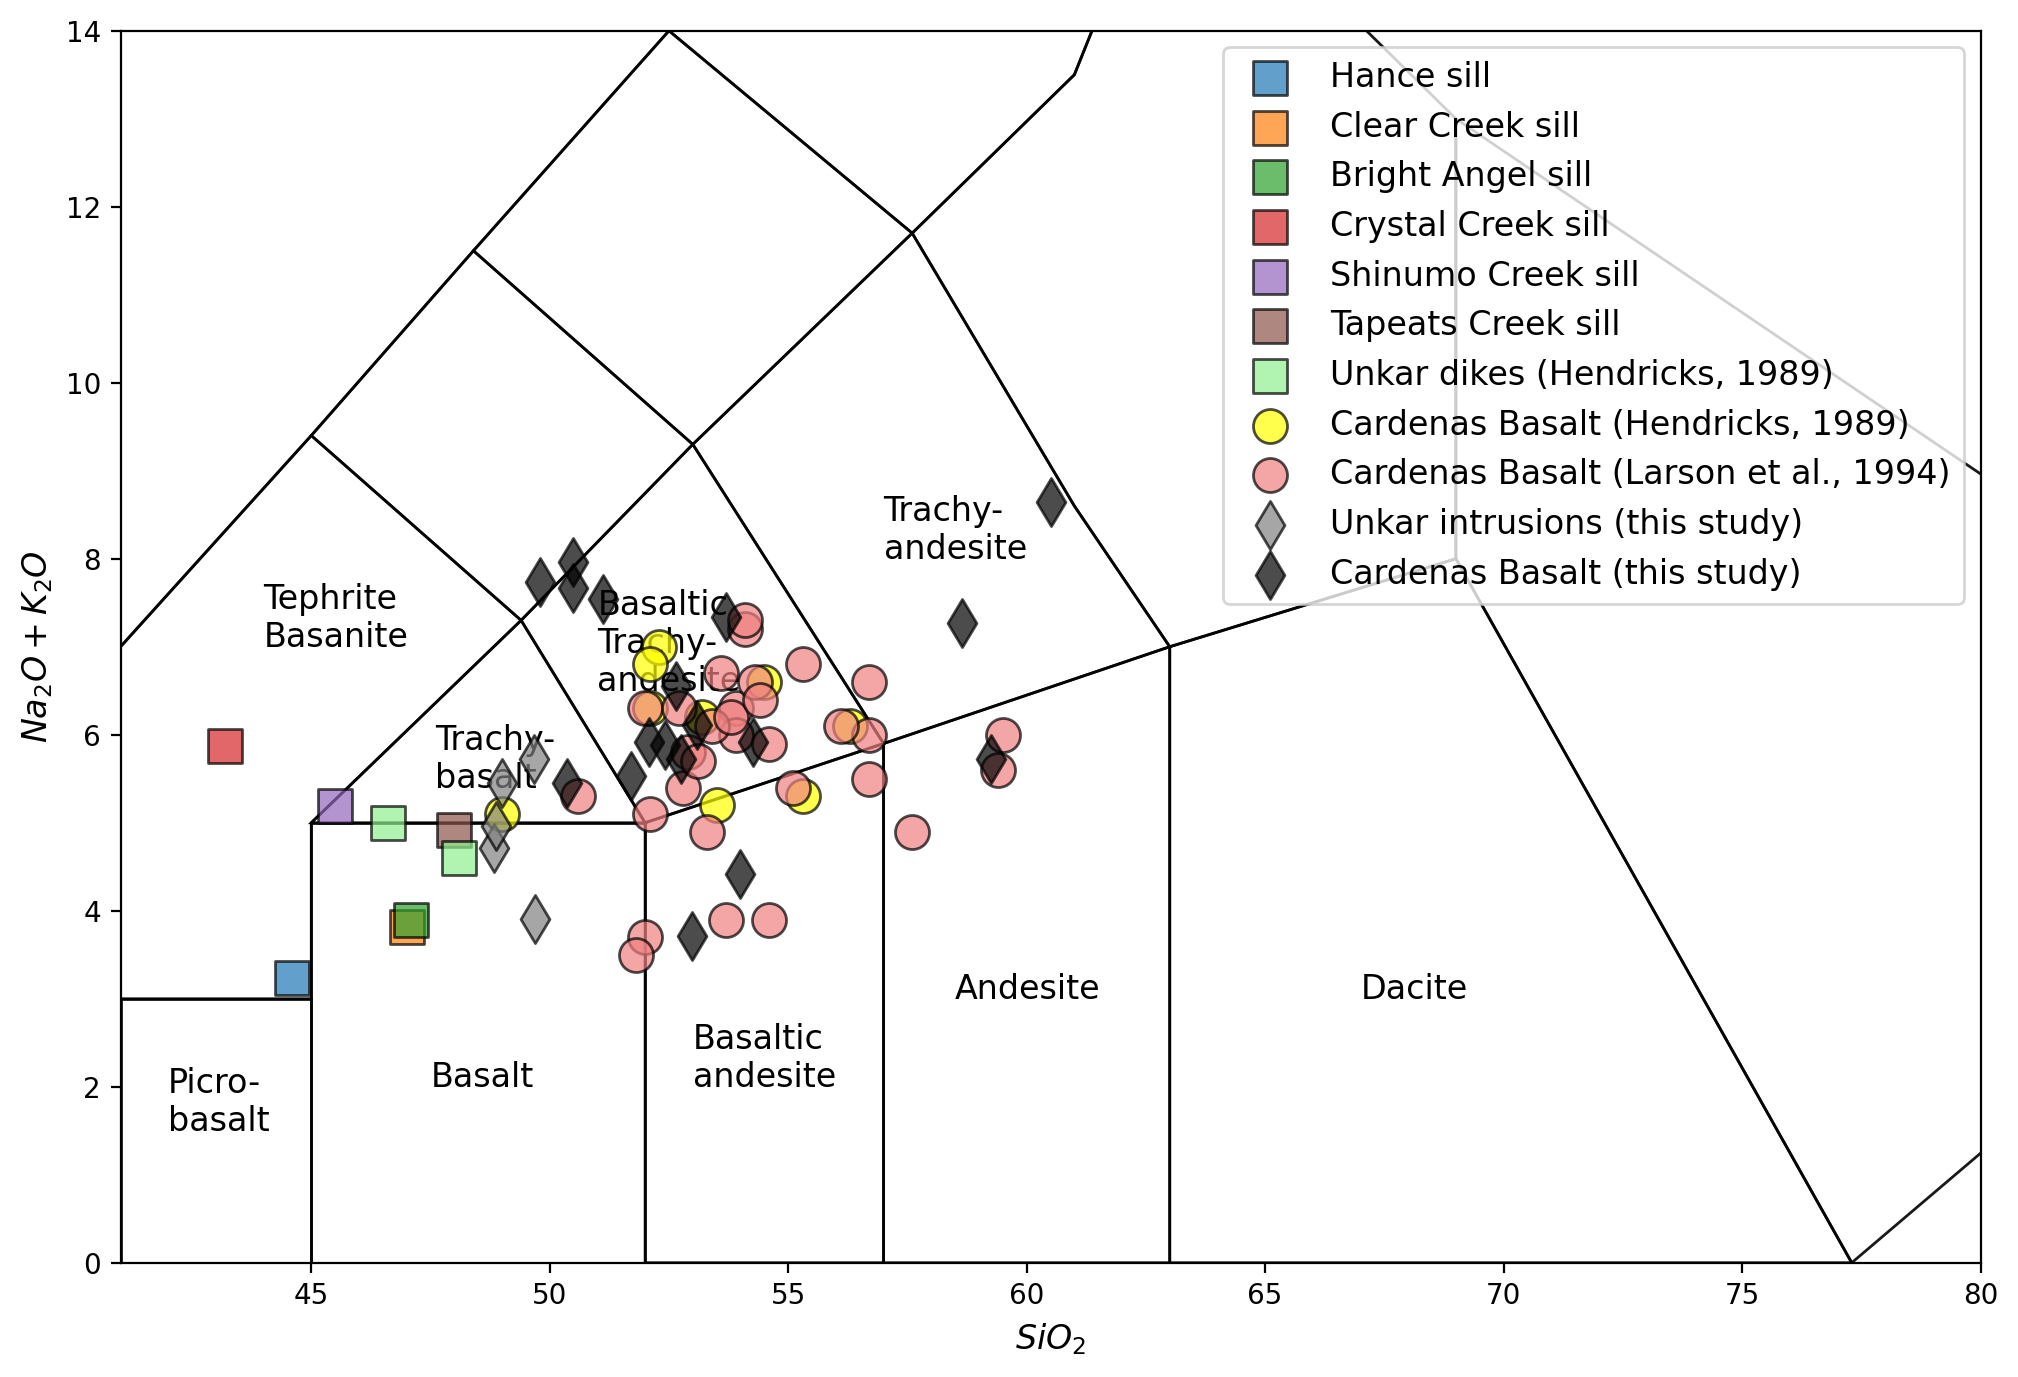

In [32]:
cm = TAS(which_model="LeMaitreCombined")
fig, ax = plt.subplots(1, figsize = (12,8))
# for i in range(Larson1994_major_data.shape[0]):
#     ax.scatter(Larson1994_major_data["SiO2"][i], Larson1994_major_data["Na2O"][i]+Larson1994_major_data['K2O'][i], 100,
#                    c= 'C0', marker = 'o',  edgecolor = 'black', alpha=0.9, 
#                label = Larson1994_major_data['No.'][i])

cm.add_to_axes(ax, alpha=0.9, zorder=1, add_labels=0, labels='volcanic')
for j in range(Hendricks1989a_sills.shape[0]):
    ax.scatter(Hendricks1989a_sills["SiO2"][j], Hendricks1989a_sills["Na2O"][j]+Hendricks1989a_sills['K2O'][j], 150,
                   c= 'C'+str(j), marker = 's',  zorder=100, edgecolor = 'black', alpha=0.7, label=Hendricks1989a_sills['name'][j])
ax.scatter(Hendricks1989a_Unkar_dike["SiO2"], Hendricks1989a_Unkar_dike["Na2O"]+Hendricks1989a_Unkar_dike['K2O'], 150,
                c= 'lightgreen', marker = 's',  zorder=100,  edgecolor = 'black', alpha=0.7, label = 'Unkar dikes (Hendricks, 1989)')

ax.scatter(Hendricks1989a_lavas["SiO2"], Hendricks1989a_lavas["Na2O"]+Hendricks1989a_lavas['K2O'], 150,
                   c= 'yellow', marker = 'o',  zorder=100, edgecolor = 'black', alpha=0.7, label='Cardenas Basalt (Hendricks, 1989)')

ax.scatter(Larson1994_major_data["SiO2"], Larson1994_major_data["Na2O"]+Larson1994_major_data['K2O'], 150,
                c= 'lightcoral', marker = 'o',  zorder=100,  edgecolor = 'black', alpha=0.7, label = 'Cardenas Basalt (Larson et al., 1994)')

ax.scatter(UI_new_XRF_norm_major["SiO2"], UI_new_XRF_norm_major["Na2O"]+UI_new_XRF_norm_major['K2O'], 150,
                c= 'grey', marker = 'd',  zorder=100,  edgecolor = 'black', alpha=0.7, label = 'Unkar intrusions (this study)')
ax.scatter(CB_new_XRF_norm_major["SiO2"], CB_new_XRF_norm_major["Na2O"]+CB_new_XRF_norm_major['K2O'], 150,
                c= 'k', marker = 'd',  zorder=100,  edgecolor = 'black', alpha=0.7, label = 'Cardenas Basalt (this study)')

ax.text(42, 1.5, 'Picro-\nbasalt', fontsize=12)
ax.text(47.5, 2, 'Basalt', fontsize=12)
ax.text(53, 2, 'Basaltic\nandesite', fontsize=12)
ax.text(58.5, 3, 'Andesite', fontsize=12)
ax.text(67, 3, 'Dacite', fontsize=12)

ax.text(44, 7, 'Tephrite\nBasanite', fontsize=12)
ax.text(47.6, 5.4, 'Trachy-\nbasalt', fontsize=12)
ax.text(51, 6.5, 'Basaltic\nTrachy-\nandesite', fontsize=12)
ax.text(57, 8, 'Trachy-\nandesite', fontsize=12)


plt.xlim(41,80)
plt.ylim(0,14)
plt.legend(ncol=1, loc='upper right', fontsize=12, frameon=True, facecolor='white')
plt.savefig('./code_output/Cardenas_Unkar_geochem_major.pdf', bbox_inches='tight')
plt.show()

## trace element diagram

In [44]:
Larson1994a_Hance = Larson1994a_trace_data[Larson1994a_trace_data['Flow No.'] == 'HANCE INT'].reset_index(drop=1)
Larson1994a_Cardenas = Larson1994a_trace_data[Larson1994a_trace_data['Flow No.'] != 'HANCE INT'].reset_index(drop=1)

In [45]:
chondrite = get_reference_composition("Chondrite_SM89")
CI = chondrite.set_units("ppm")
chondrite.comp.columns

Index(['Cs', 'Tl', 'Rb', 'Ba', 'W', 'Th', 'U', 'Nb', 'Ta', 'K', 'La', 'Ce',
       'Pb', 'Pr', 'Mo', 'Sr', 'P', 'Nd', 'F', 'Sm', 'Zr', 'Hf', 'Eu', 'Sn',
       'Sb', 'Ti', 'Gd', 'Tb', 'Dy', 'Li', 'Y', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

In [46]:
trace_elements = ['Ba', 'Rb', 'Th', 'Nb', 'Ta', 'La', 'Ce', 'Sr', 'Nd', 
                  'Sm', 'Zr', 'Hf', 'Tb', 'Y', 'Yb', 'Lu']
trace_elements_chondrite = ['Ba', 'Rb', 'Th', 'Nb', 'Ta', 'La', 'Ce', 'Sr', 'Nd',
                  'Sm', 'Zr', 'Hf', 'Tb', 'Y', 'Yb', 'Lu']

In [47]:
Larson1994a_Cardenas_bounds = Larson1994a_Cardenas[trace_elements].agg([min, max])/chondrite.comp[trace_elements_chondrite].values[0]
Larson1994a_Cardenas_bounds

,Ba,Rb,Th,Nb,Ta,La,Ce,Sr,Nd,Sm,Zr,Hf,Tb,Y,Yb,Lu
min,53.941909,6.465517,38.965517,32.520325,34.285714,42.194093,39.379085,14.049587,25.910064,23.594771,27.906977,25.515947,20.588235,22.929936,17.764706,15.551181
max,385.062241,44.827586,258.965517,48.780488,55.000000,125.316456,88.398693,58.402204,82.441113,54.509804,53.229974,56.097561,40.106952,43.949045,29.470588,23.228346


In [50]:
UI_new_trace_data_bounds = UI_new_trace_data[trace_elements].agg([min, max])/chondrite.comp[trace_elements_chondrite].values[0]
CB_new_trace_data_bounds = CB_new_trace_data[trace_elements].agg([min, max])/chondrite.comp[trace_elements_chondrite].values[0]

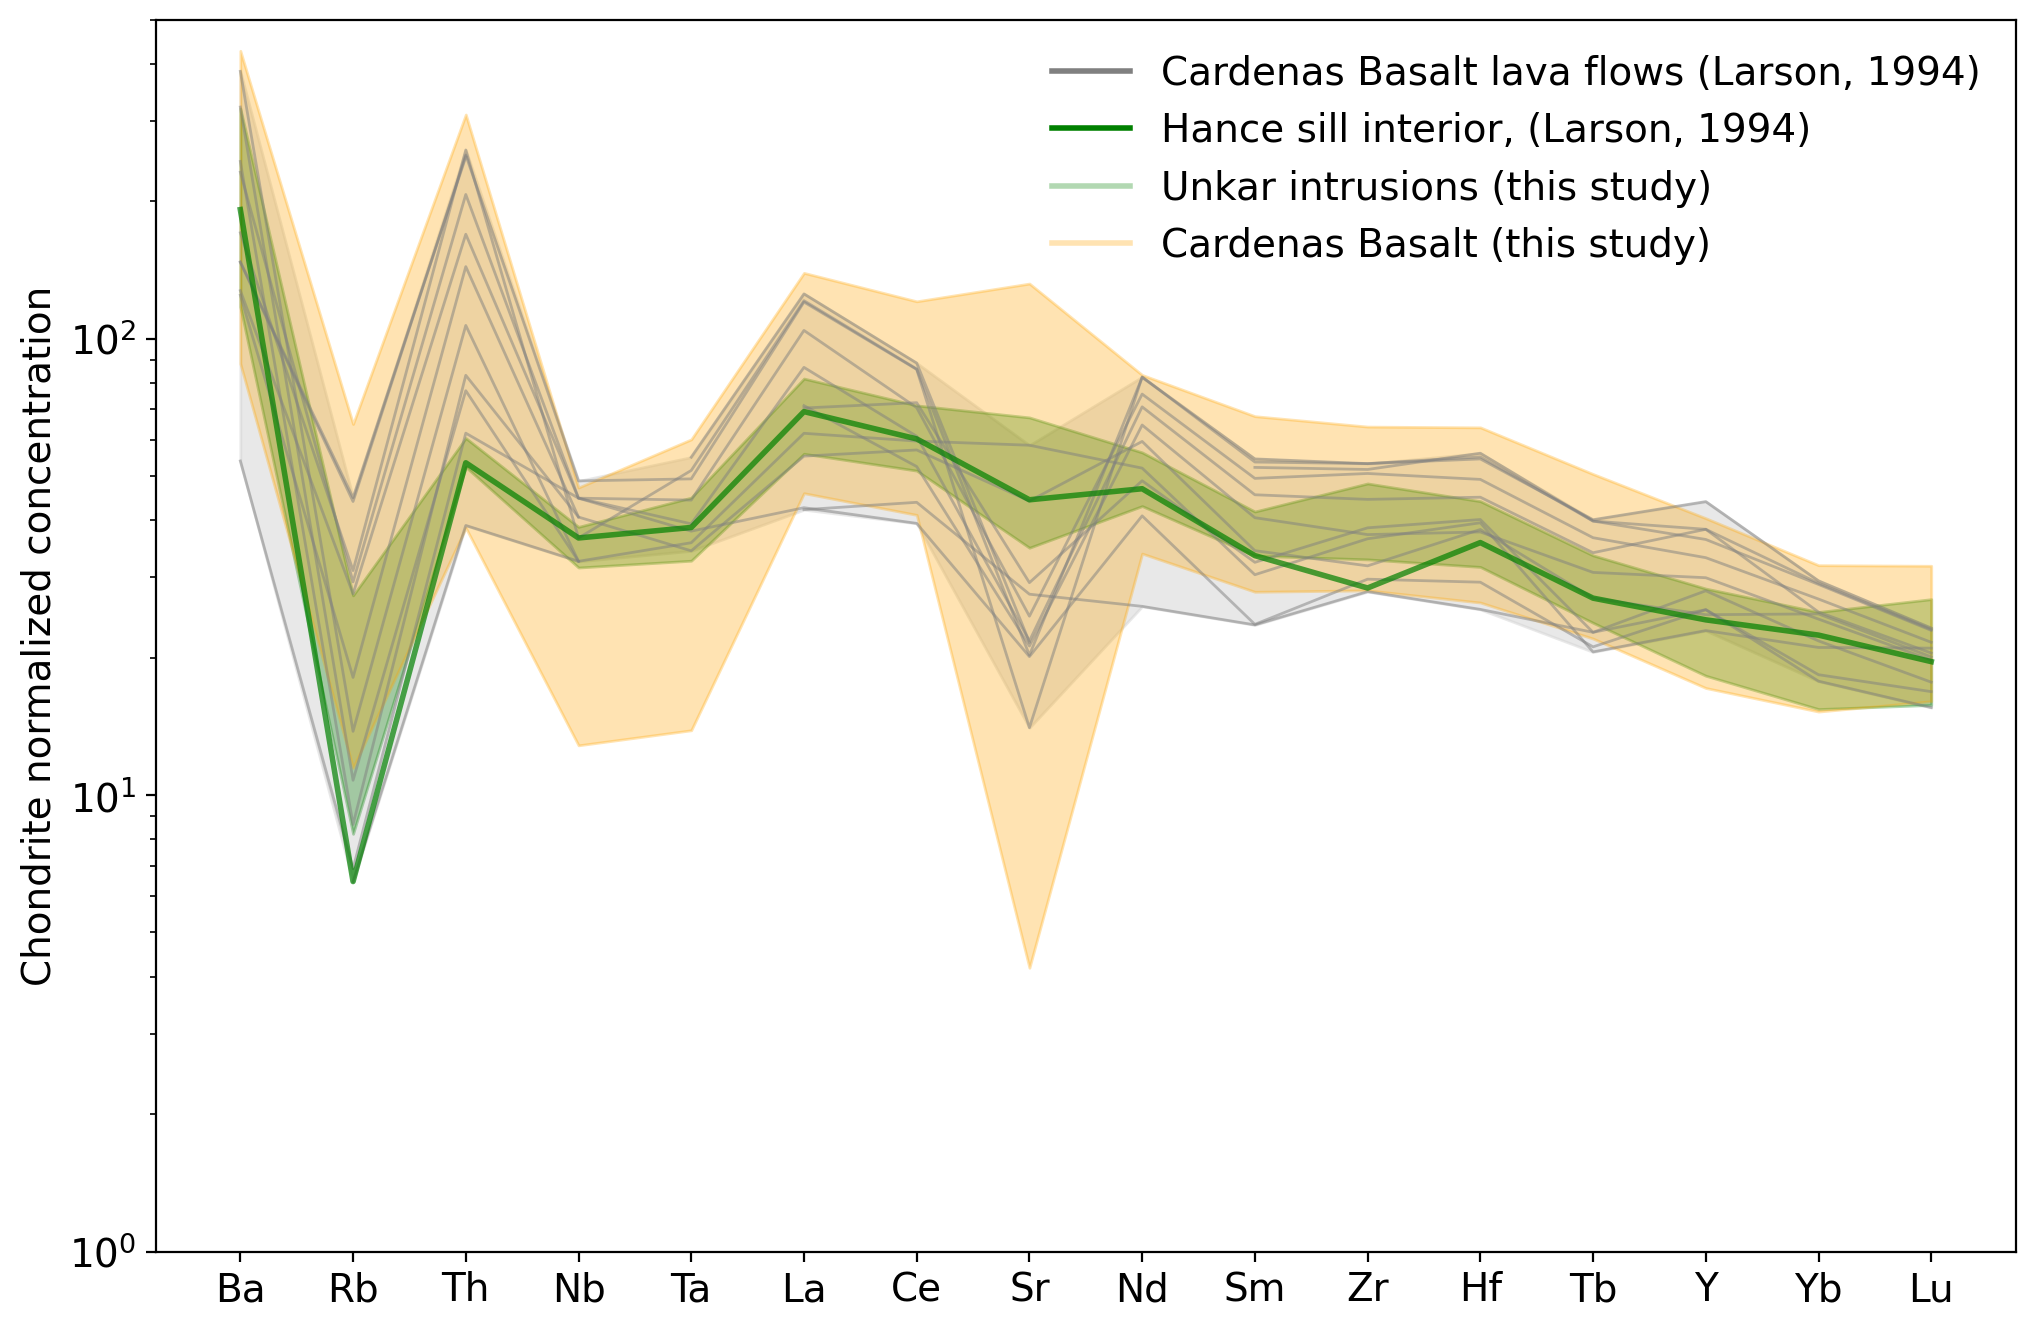

In [60]:
fig, ax = plt.subplots(1, figsize = (12, 8))

for i in range(Larson1994a_Cardenas.shape[0]):
    
    ax.plot(trace_elements, Larson1994a_Cardenas[trace_elements].iloc[i]/chondrite.comp[trace_elements_chondrite].values[0], 
            color = 'gray', lw=1, alpha=0.5)

ax.plot(trace_elements, Larson1994a_Hance[trace_elements].iloc[0]/chondrite.comp[trace_elements_chondrite].values[0], 
            color = 'green', lw=2, alpha=0.7, label='Hance sill interior (Larson, 1994)')

ax.fill_between(trace_elements, 
                Larson1994a_Cardenas_bounds.loc['max'], 
                Larson1994a_Cardenas_bounds.loc['min'], 
                color='lightgrey', alpha=0.5, label='Cardenas Basalt lava flows (Larson, 1994)')

ax.fill_between(trace_elements, 
                UI_new_trace_data_bounds.loc['max'], 
                UI_new_trace_data_bounds.loc['min'], 
                color='g', alpha=0.3, label='Unkar intrusions (this study)')

ax.fill_between(trace_elements, CB_new_trace_data_bounds.loc['max'], CB_new_trace_data_bounds.loc['min'], color='orange', alpha=0.3, label='Cardenas Basalt (this study)')

# for i in range(UI_new_trace_data.shape[0]):
#     ax.plot(trace_elements, UI_new_trace_data[trace_elements].iloc[i]/chondrite.comp[trace_elements_chondrite].values[0],
#             color = 'b', lw=1, alpha=0.5)
# for i in range(CB_new_trace_data.shape[0]):
#     ax.plot(trace_elements, CB_new_trace_data[trace_elements].iloc[i]/chondrite.comp[trace_elements_chondrite].values[0],
#             color = 'r', lw=1, alpha=0.5)



custom_lines = [Line2D([0], [0], color='gray', lw=2),
                Line2D([0], [0], color='green', lw=2), 
                Line2D([0], [0], color='green', alpha=0.3, lw=2),
                Line2D([0], [0], color='orange', alpha=0.3, lw=2)]

plt.yscale('log')
plt.ylim(1, 500)
plt.ylabel('Chondrite normalized concentration', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(custom_lines, ['Cardenas Basalt lava flows (Larson, 1994)', 
                          'Hance sill interior, (Larson, 1994)', 
                          'Unkar intrusions (this study)', 
                          'Cardenas Basalt (this study)'], fontsize=14, loc='upper right')

# plt.savefig('./code_output/Larson1994a_trace_elements.pdf', bbox_inches='tight')
plt.show()